# The purpose is to simulate an hologram in Sagemath


- author : Sylvie Dagoret-Campagne
- affiliation : LAL/CNRS
- date : March 09 2017


To lauch the jupyter notebook do


- sage -n jupyter



Here really simulate for a punctual source and amplitude dependance of distance

In [1]:
import sys
pylibpath="/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages"
sys.path.append(pylibpath)
import numpy as np
import astropy
#import pandas

## Constants

In [1]:
nm_to_mm= 1e-6

In [2]:
dz=56.6 # mm  : distance between sources plane and hologram plane

In [3]:
dy=6.4 # mm   : off-optical axis shift of one source wrt another

## Units

- all in mm

In [4]:
lambda_0=600*nm_to_mm # nm to mm

## Définition de l'amplitude d'une source ponctuelle


- soit une source monochromatique de longueur d'onde $\lambda_0$, placée en $O(0,0,0)$, on considère l'amplitude en $M(x,y,z)$

$$
U(x,y,z) = \frac{\cos (\vec{k} \cdot \vec{OM} - \omega t)}{\| \vec{OM} \|}  = \frac{\cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+y^2+z^2} -\omega t)}{\sqrt{x^2+y^2+z^2}}
$$

Par la suite, on se place à un instant fixé $t$. La dépendance temporelle peut être éliminée


In [5]:
x,y,z = var('x,y,z')
U(x,y,z) = cos(2*pi*sqrt(x**2+y**2+z**2)/lambda_0)/sqrt(x**2+y**2+z**2)

## Amplitude au niveau de la source

In [6]:
p=plot(U(x,0,0),-0.001,0.001)

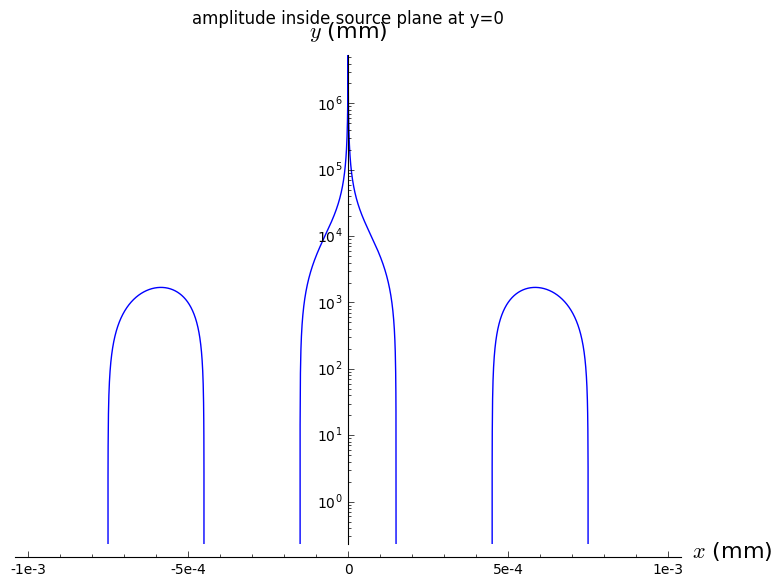

In [7]:
p.show(title="amplitude inside source plane at y=0",axes_labels=('$x$ (mm)','$y$ (mm)'),scale='semilogy')

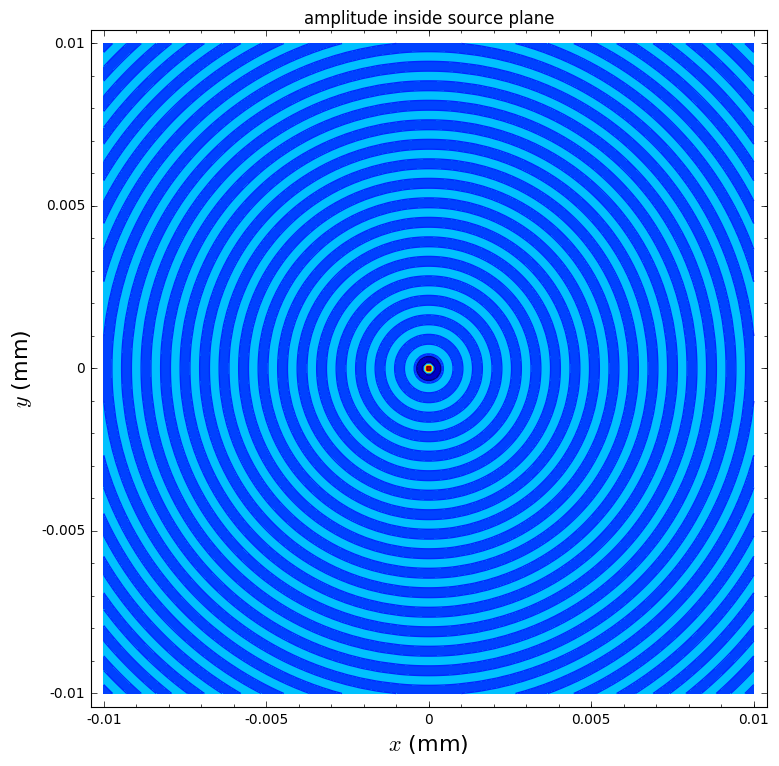

In [8]:
x,y = var('x,y')
g=contour_plot(U(x,y,0), (x,-0.01,0.01), (y,-0.01,0.01),plot_points=200,cmap='jet',figsize=[8,8])
g.show(title="amplitude inside source plane",axes_labels=('$x$ (mm)','$y$ (mm)'))

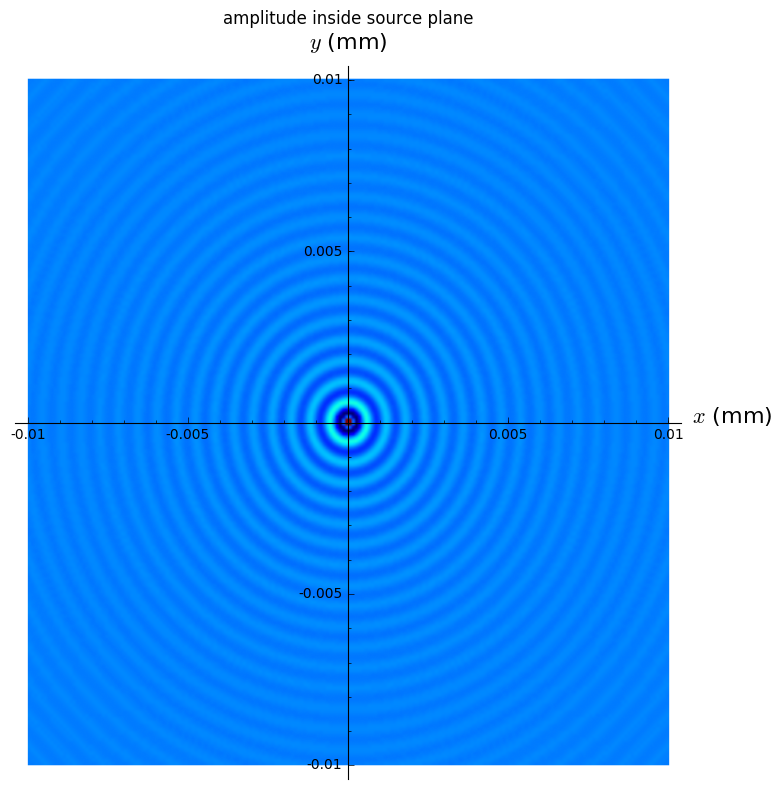

In [9]:
g=density_plot(U(x,y,0), (x,-0.01,0.01), (y,-0.01,0.01), plot_points=200,cmap='jet',figsize=[8,8])
g.show(title="amplitude inside source plane",axes_labels=('$x$ (mm)','$y$ (mm)'))

In [10]:
#x,y = var('x,y')
#complex_plot(U(x,y,0), (x,-0.01,0.01), (y,-0.01,0.01))

## Dans le plan de l'hologramme

### Source placée sur l'axe optique


On se place maintenant dans le plan de l'hologramme qui est à la distance z=-dz de la source $S1$ placée sur l'axe
optique $z$.
L'amplitude de $S1$ and le plan de l'hologramme est


$$
U_1(x,y)=U(x,y,-dz)= \frac{\cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+y^2+(dz)^2})}{\sqrt{x^2+y^2+(dz)^2}}
$$


In [11]:
U1(x,y)=U(x,y,-dz)

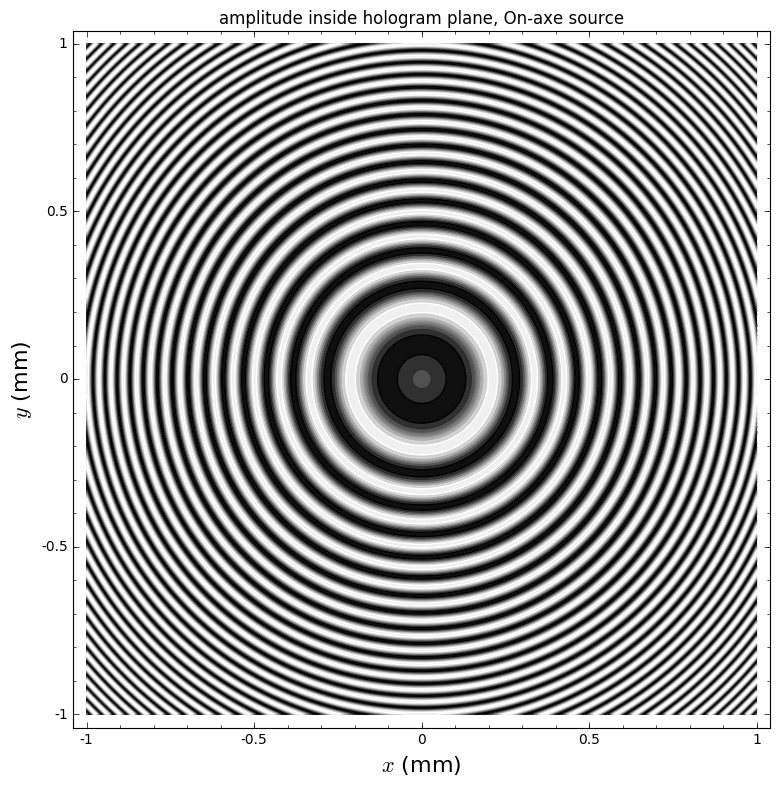

In [12]:
g=contour_plot(U1(x,y), (x,-1.0,1.0), (y,-1.0,1.0),plot_points=500,figsize=[8,8])
g.show(title="amplitude inside hologram plane, On-axe source",axes_labels=('$x$ (mm)','$y$ (mm)'))

### Source hors axe optique

On se place maintenant dans le plan de l'hologramme qui est à la distance z=-dz de la source $S2$ déplacée de $dy$ hors axe
optique.
L'amplitude de $S1$ and le plan de l'hologramme est


$$
U_2(x,y)=U(x,y+dy,-dz)= \frac{\cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+(y+dy)^2+(dz)^2})}{\sqrt{x^2+(y+dy)^2+(dz)^2}}
$$




In [13]:
U2(x,y)=U(x,y+dy,-dz)

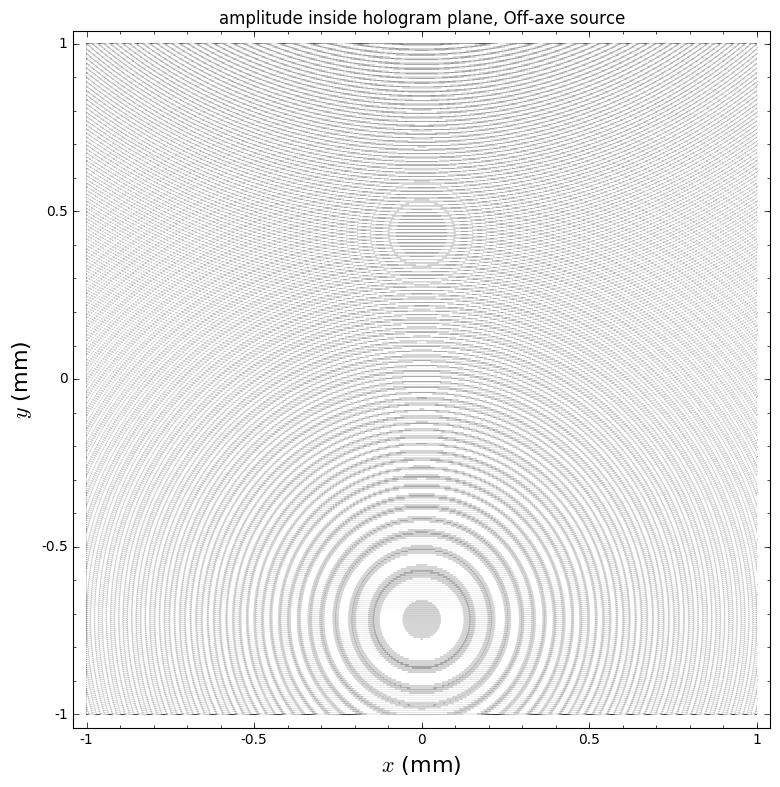

In [14]:
g=contour_plot(U2(x,y), (x,-1.00,1.0), (y,-1.0,1.0),plot_points=1000,figsize=[8,8])
g.show(title="amplitude inside hologram plane, Off-axe source",axes_labels=('$x$ (mm)','$y$ (mm)'))

## Somme des amplitudes


Les amplitudes des deux sources $S1$ et $S2$ interfèrent.
Dans le plan de l'hologramme, on obtient l'amplitude:
$$
U(x,y)=U_1(x,y)+U_2(x,y)= \frac{\cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+y^2+(dz)^2})}{\sqrt{x^2+y^2+(dz)^2}}+\frac{ \cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+(y+dy)^2+(dz)^2})}{\sqrt{x^2+(y+dy)^2+(dz)^2}}
$$

In [15]:
U3(x,y)=U1(x,y)+U2(x,y)

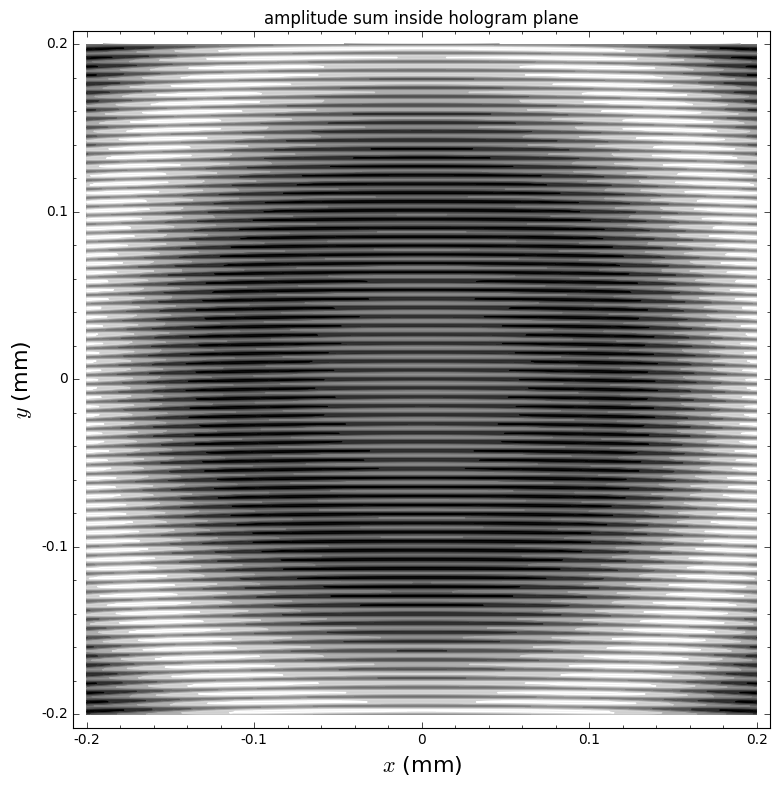

In [16]:
g=contour_plot(U3(x,y), (x,-0.20,0.2), (y,-0.2,0.2),plot_points=500,figsize=[8,8])
g.show(title="amplitude sum inside hologram plane",axes_labels=('$x$ (mm)','$y$ (mm)'))

## Intensité
Les amplitudes des deux sources $S1$ et $S2$ interfèrent.
Dans le plan de l'hologramme, on obtient l'intensité:
$$
I(x,y)= \left\| U_1(x,y)+U_2(x,y) \right\|^2= \left\| \frac{\cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+y^2+(dz)^2})}{\sqrt{x^2+y^2+(dz)^2}}+\frac{ \cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+(y+dy)^2+(dz)^2})}{\sqrt{x^2+(y+dy)^2+(dz)^2}} \right\|^2
$$


In [17]:
U4(x,y)=U3(x,y)**2

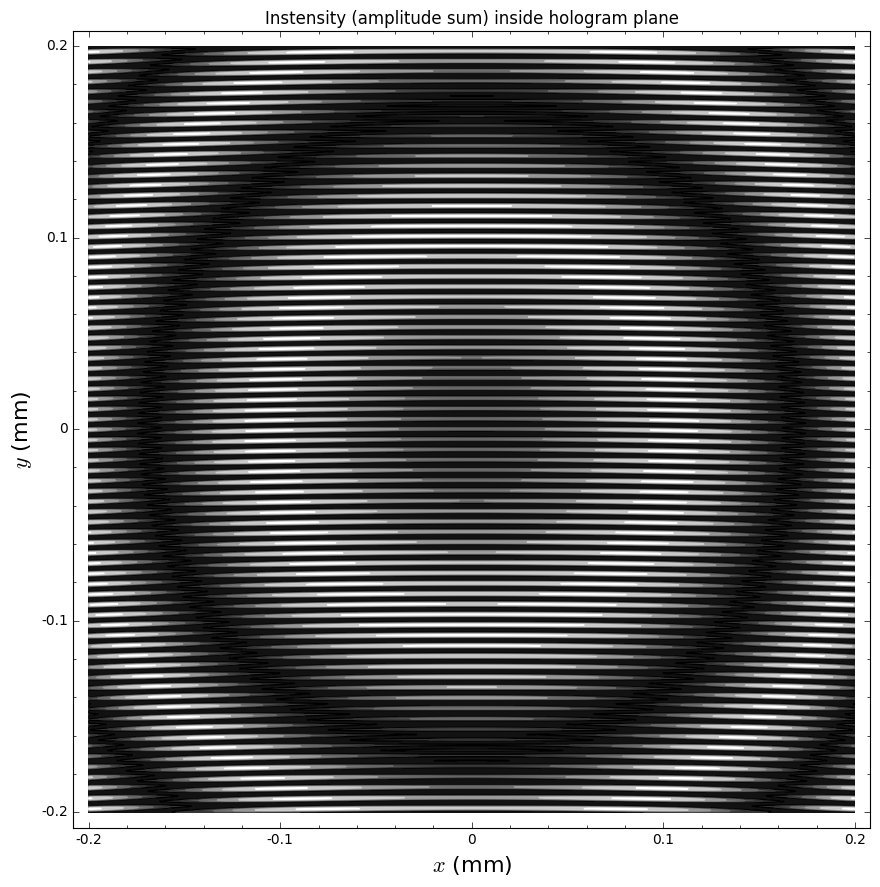

In [18]:
g=contour_plot(U4(x,y), (x,-0.20,0.2), (y,-0.2,0.2),plot_points=2000,figsize=[9,9])
g.show(title="Instensity (amplitude sum) inside hologram plane",axes_labels=('$x$ (mm)','$y$ (mm)'))

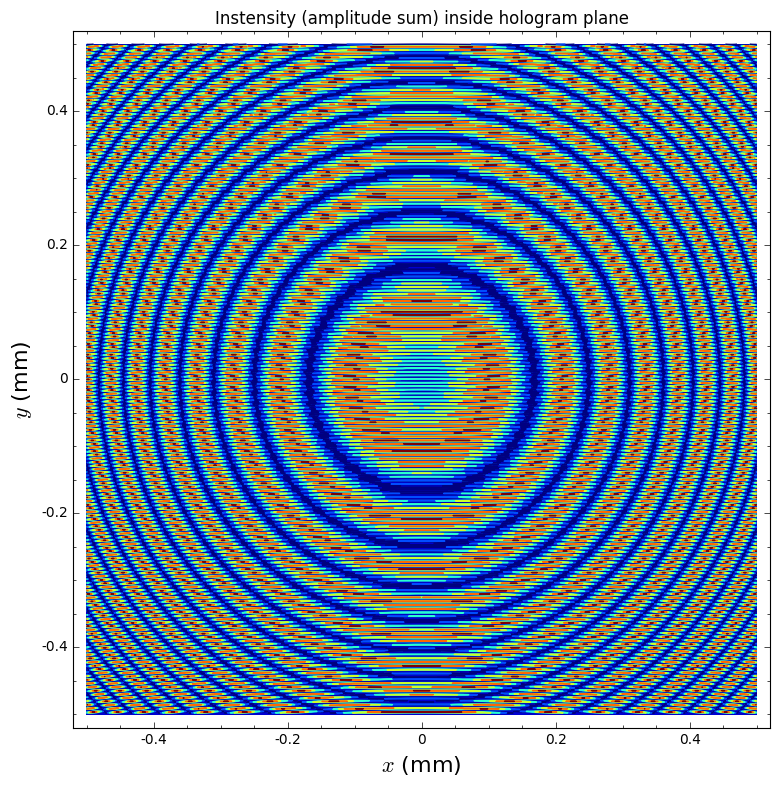

In [19]:
g=contour_plot(U4(x,y), (x,-.5,0.5), (y,-.5,0.5),plot_points=1000,figsize=[8,8],cmap='jet')
g.show(title="Instensity (amplitude sum) inside hologram plane",axes_labels=('$x$ (mm)','$y$ (mm)'))

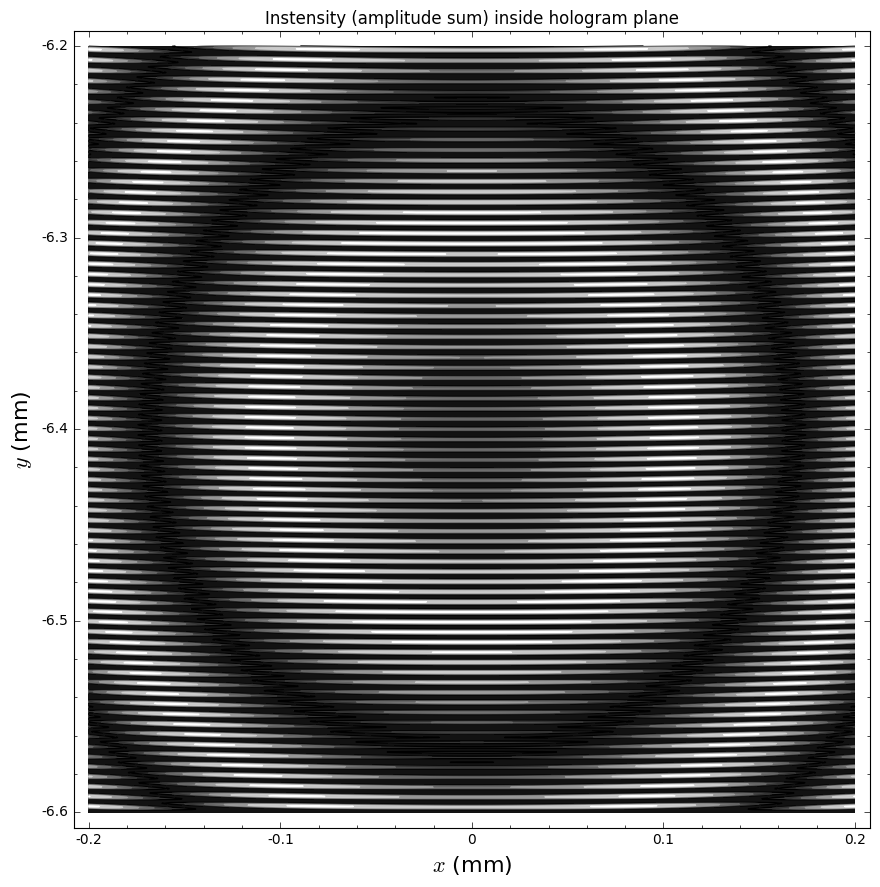

In [20]:
g=contour_plot(U4(x,y), (x,-0.20,0.2), (y,-0.2-dy,0.2-dy),plot_points=2000,figsize=[9,9])
g.show(title="Instensity (amplitude sum) inside hologram plane",axes_labels=('$x$ (mm)','$y$ (mm)'))

In [21]:
U5(y)=U4(0,y)

In [31]:
p=plot(U5(y),-0.05,0.05)

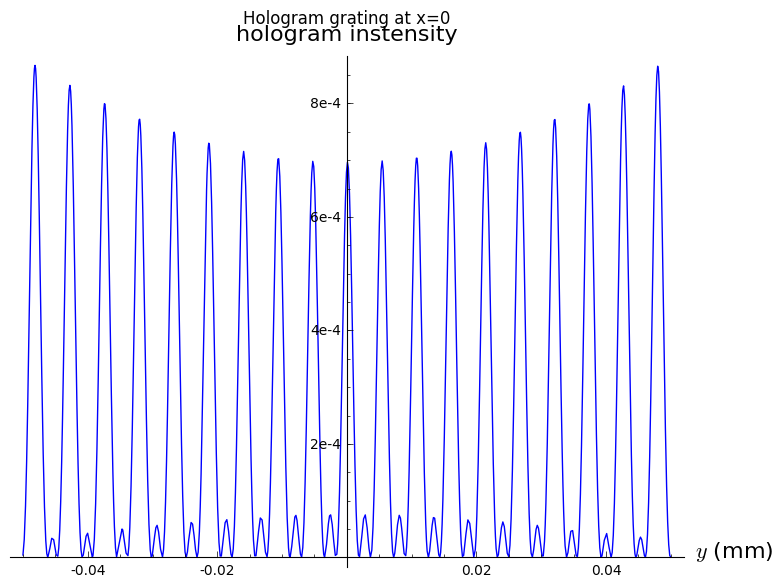

In [32]:
p.show(title="Hologram grating at x=0",axes_labels=('$y$ (mm)','hologram instensity'))

In [33]:
p=plot(U5(y),-1.05,-0.95)

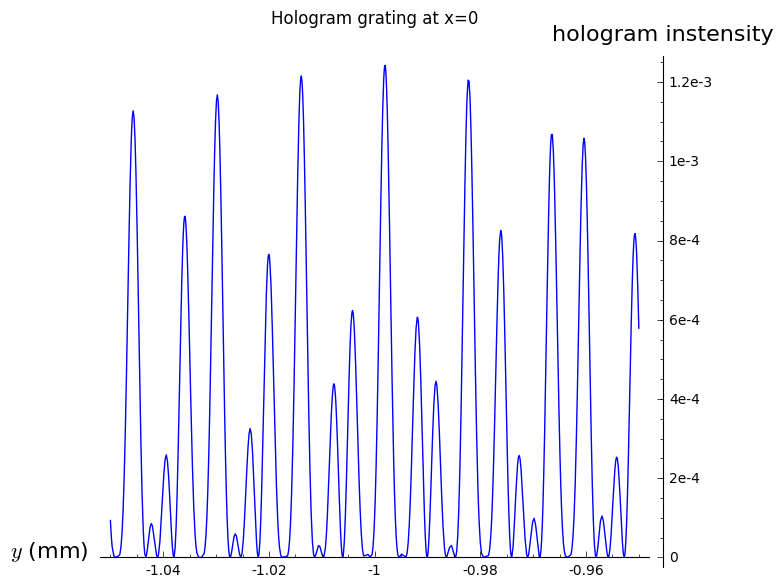

In [35]:
p.show(title="Hologram grating at x=0",axes_labels=('$y$ (mm)','hologram instensity'))

In [36]:
p=plot(U5(y),0.95,1.05)

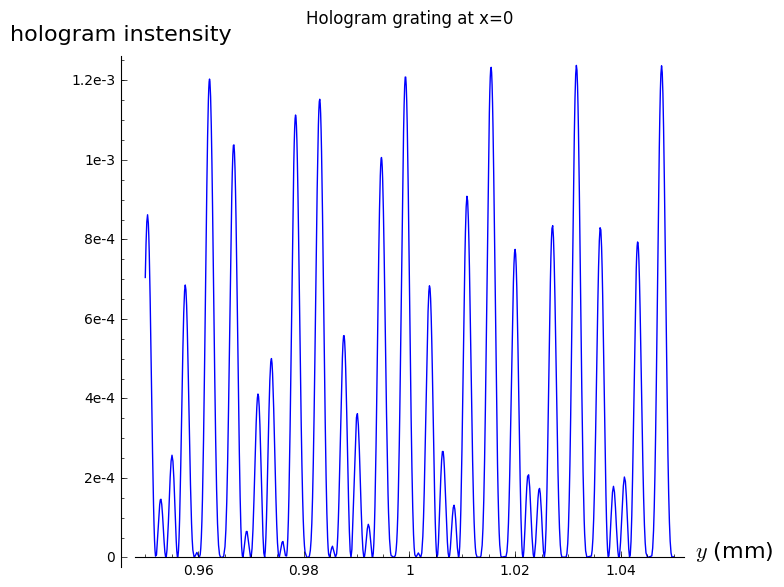

In [37]:
p.show(title="Hologram grating at x=0",axes_labels=('$y$ (mm)','hologram instensity'))